In [1]:
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

The code below uses samples that all have the same masses/energy but different displacements. This serves to observe the effect of different displacements (all else being the same) on photons in the plots. There are 3 sample groups to look at. Samples 3 notably is the brightest on a 3-D plot, so it may be the most interesting to look at.
Channels 1 was defined to look at the barrels photons and apply loose ID to them. Because it is gen level, we can check by "matching" gen level photons to see if the plots are accurate.

In [2]:
samples1 = [
    "2Mu2E_1000GeV_0p25GeV_0p002mm",
    "2Mu2E_1000GeV_0p25GeV_0p02mm",
    "2Mu2E_1000GeV_0p25GeV_0p2mm",
    "2Mu2E_1000GeV_0p25GeV_1mm",
    "2Mu2E_1000GeV_0p25GeV_2mm"   
]

samples2 = [
    "2Mu2E_100GeV_0p25GeV_0p02mm",
    "2Mu2E_100GeV_0p25GeV_0p2mm",
    "2Mu2E_100GeV_0p25GeV_2mm",
    "2Mu2E_100GeV_0p25GeV_10mm",
    "2Mu2E_100GeV_0p25GeV_20mm"
]

samples3 = [
    "2Mu2E_100GeV_5GeV_0p4mm",
    "2Mu2E_100GeV_5GeV_4mm",
    "2Mu2E_100GeV_5GeV_40mm",
    "2Mu2E_100GeV_5GeV_200mm",
    "2Mu2E_100GeV_5GeV_400mm"
]

samples=samples3
fileset = utilities.make_fileset(samples, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels1 = [
    "barrelpho",
    "barrelpho_matched",
    "loosebarrelpho",
    "looseBarrelpho_matched"
]

channels2 = [
    "pvAndCosmic_cuts",
    "baseNoLj",
    "base"
]

channels=channels1
    
p = sidm_processor.SidmProcessor(
    channels,
    ["photon_id"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  barrelpho
Not applying any cuts to the lepton jets for channel  barrelpho_matched
Not applying any cuts to the lepton jets for channel  loosebarrelpho
Not applying any cuts to the lepton jets for channel  looseBarrelpho_matched
Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this JaggedSelection.   electrons :  pT > 20 GeV
Not applying any cuts to the lepton jets for channel  barrelpho
Not applying any cuts to the lepton jets for channel  barrelpho_matched
Not applying any cuts to the lepton jets for channel  loosebarrelpho
Not applying any cuts to the lepton jets for channel  looseBarrelpho_matched
Uh oh, haven't evaluated this cut yet! Make sure it was included in the list of cuts you used to initialize this JaggedSelection.   electrons :  pT > 20 GeV
Not applying any cuts to the lepton jets for channel  barrelpho
Not applying any cuts to the lepton jets for channel  barr

The histogram below is putting all of the samples in the smaple group chosen on the same graph. This histogram uses channel 0 of whichever channel is chosen. The "photon_singletower" histogram is defined in hists.py
In this specific case the sample group is 100GeV_5GeV with varying displacements.

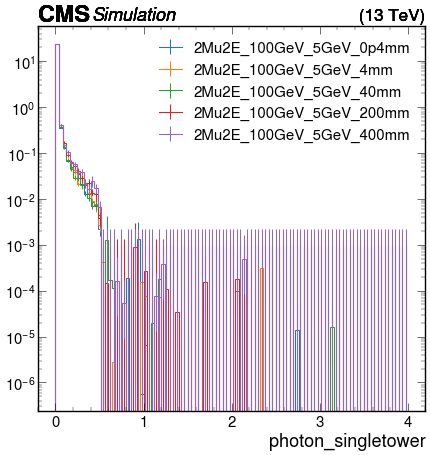

In [3]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale('log')

At least for this sample group, there seems to be no correlation between displacement and how long the "tail" is. The peak of the data is very close together with little variance.

The next graph cycles channels instead of samples. It demonstrates how each channel effects the histogram.

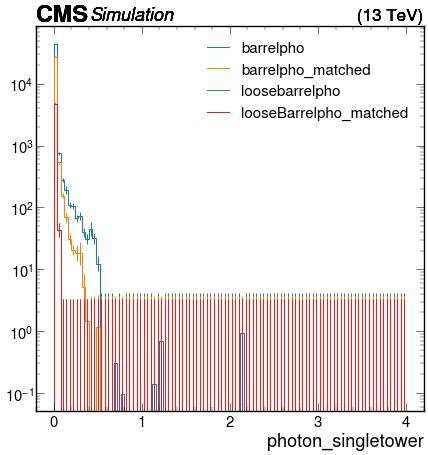

In [4]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channel, :], flow=None, label=sample)
    plt.legend(channels)
plt.yscale("log")

I removed density=True on this plot to see the peak drop and try to reveal the green plot.
The blue plot is taking JUST the barrel photons. If all photons were plotted, there would be two peaks (one for barrel and one for endcaps to the right).
The orange plot uses gen level matching to see how much of the blue plot is ACTUALLY photons that were generated, and how much is background being mistaken.
The green and red plots lie on top of one another. The green plot applies looseID to the blue plot, cutting down the data more. The red plot applies gen level matching agian, and shows the green plot was very accurate. The only difference in the dR cut, which must not make much of a difference.

The plot below takes the first histogram and plots one for EACH channel. This shows every sample in every channel.

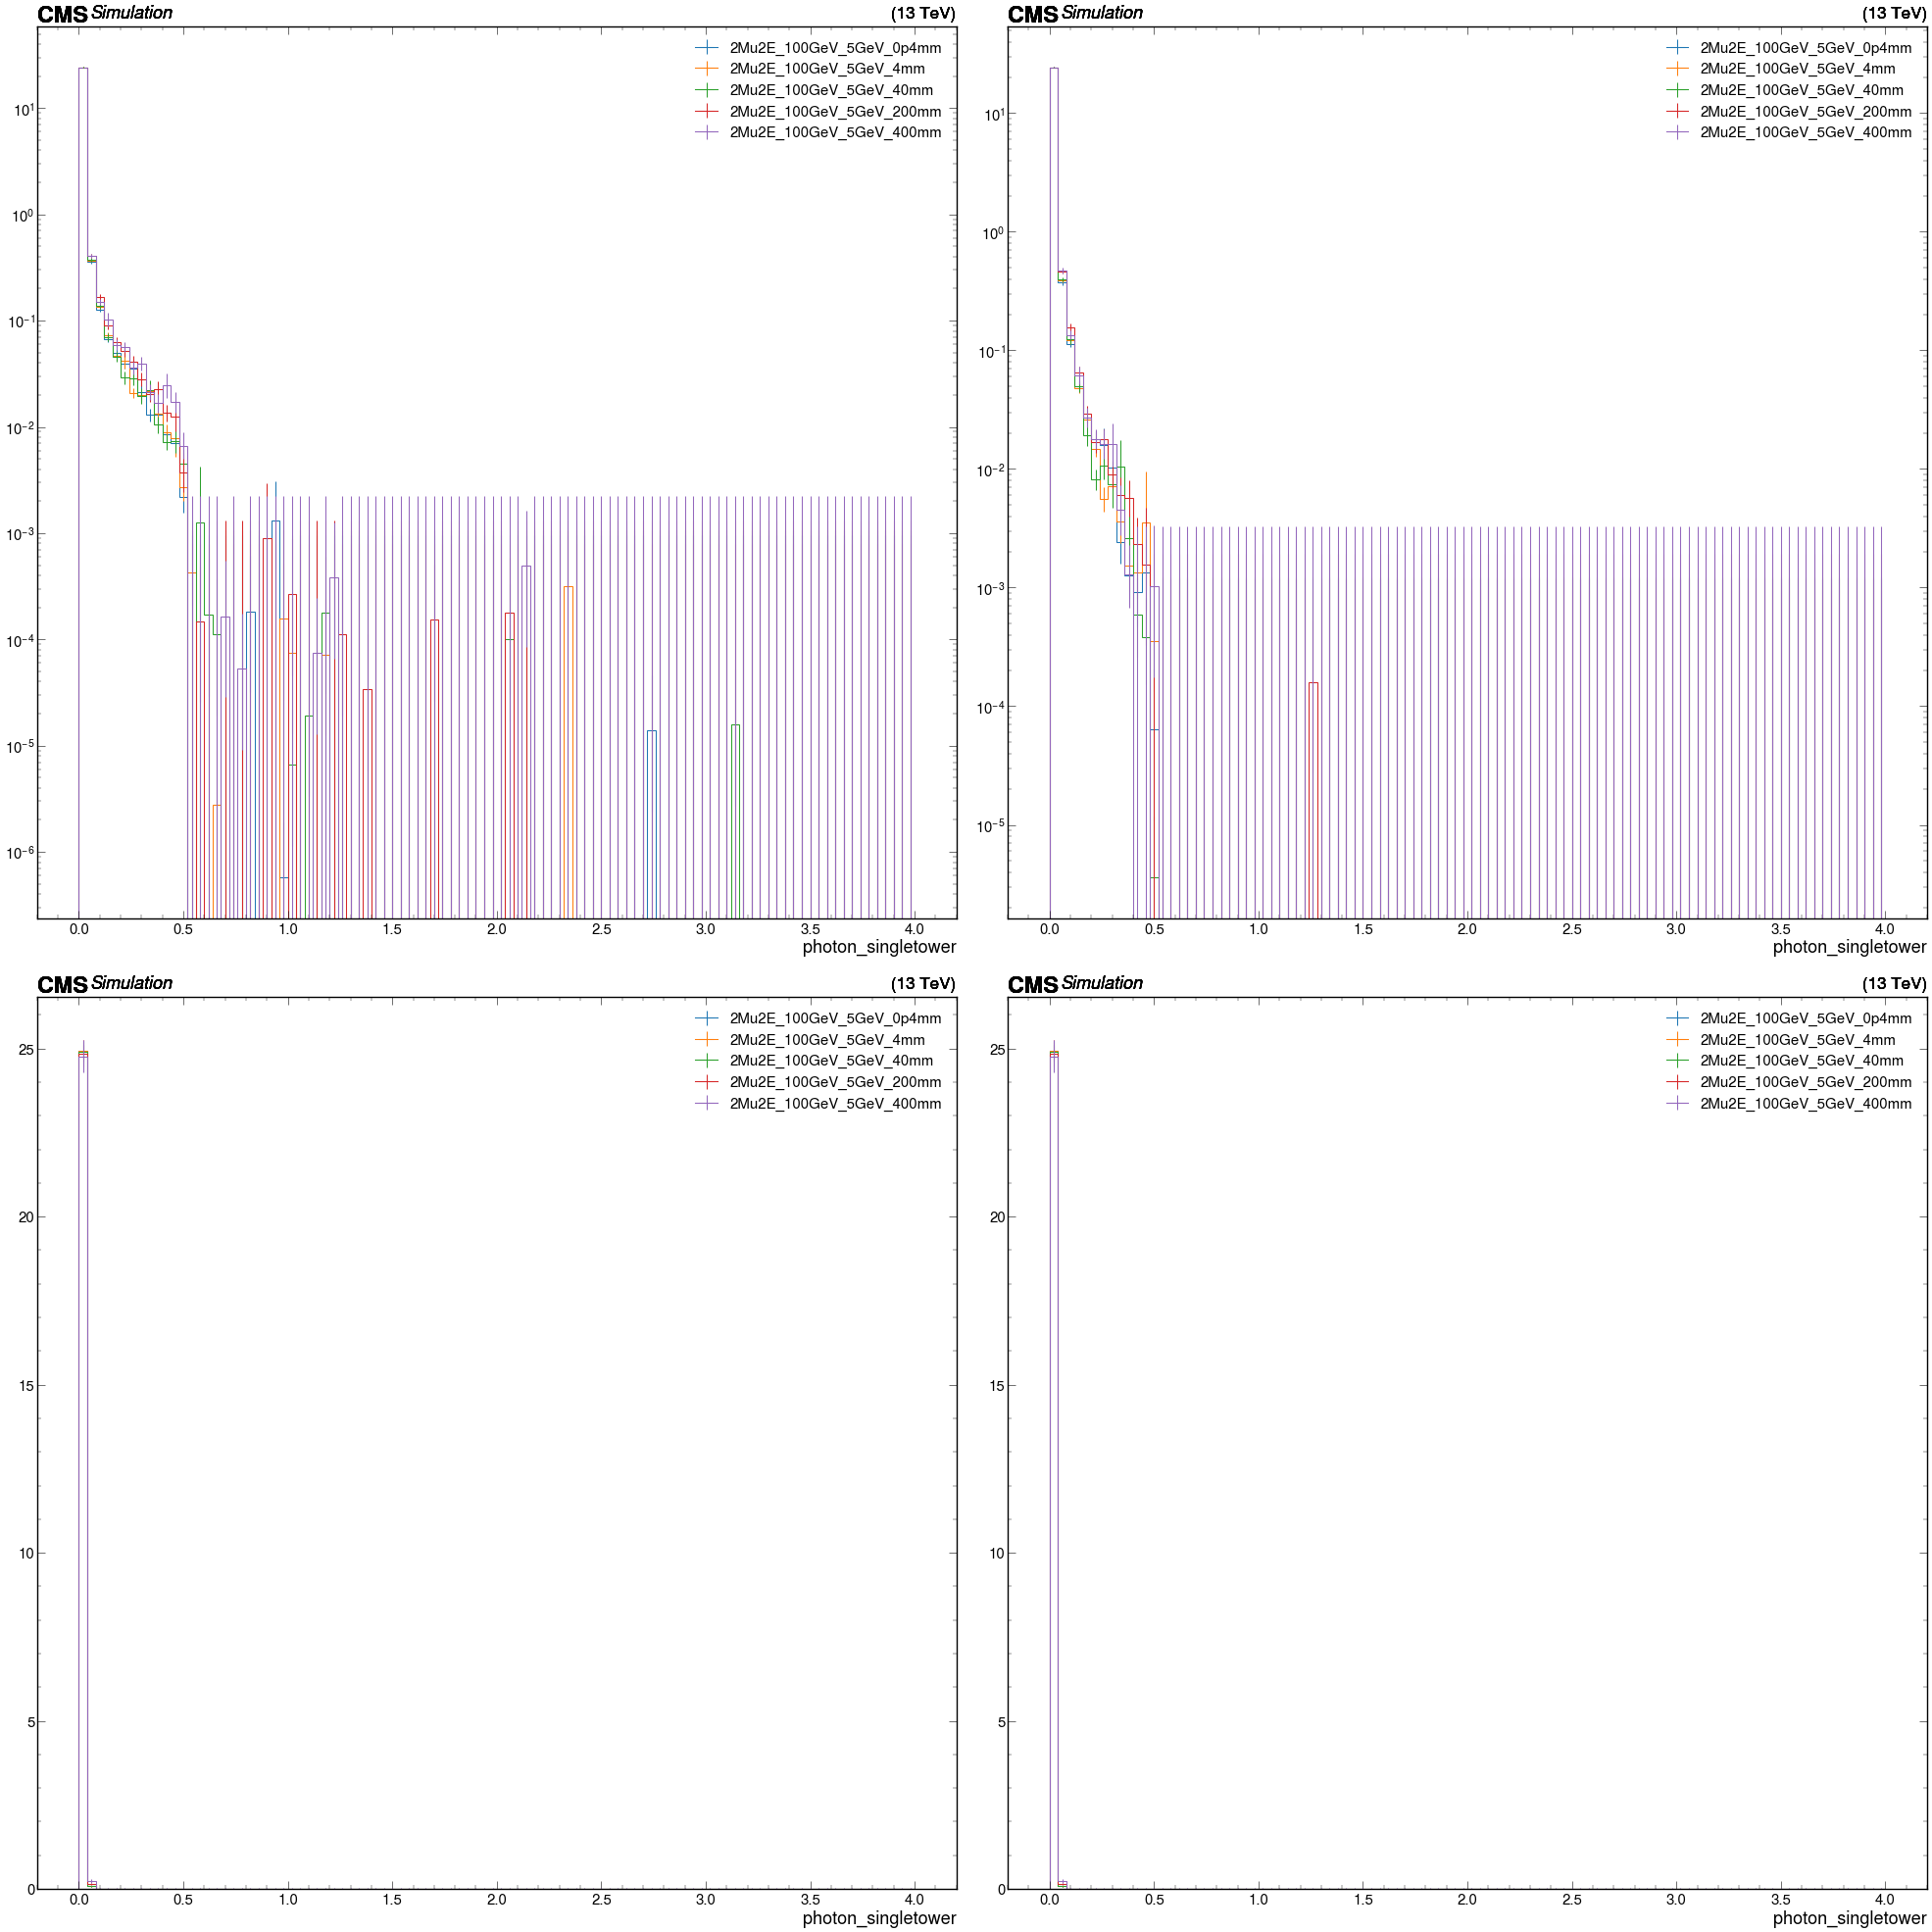

In [5]:
plt.subplots(2, 2, figsize=(40, 40))
plt.subplot(2, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[0], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(2, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[1], :], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(2, 2, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[2], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(2, 2, 4)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_singletower"][channels[3], :], density=True, flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.tight_layout()

Nothing looks out of character. There is a little generated peak on the matchedbarrelphoton plot in 100GeV_5GeV.
Perhaps the loosebarrelpho graph could be zoomed in a bit more to show some more detail happening.

The rest of the graphs repeat this cycle for two more histogram's defined in hists.py. The graphs below look at a SigmaIEtaIEta cut.

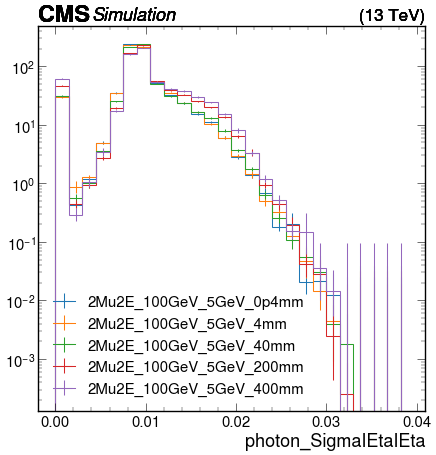

In [6]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[0], :0.04j:], density=True, flow=None, label=sample)
plt.yscale('log')
plt.legend()

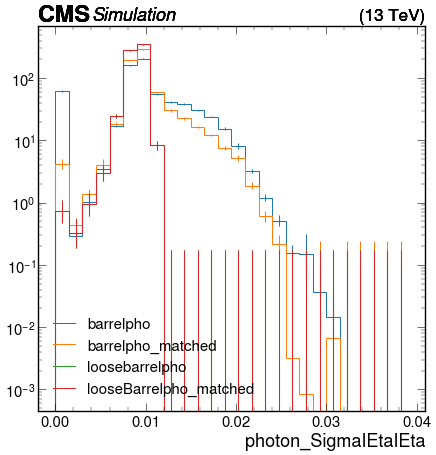

In [7]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channel, :0.040j:], density=True)
    plt.legend(channels)
plt.yscale("log")

The cuts made with looseID are clear here

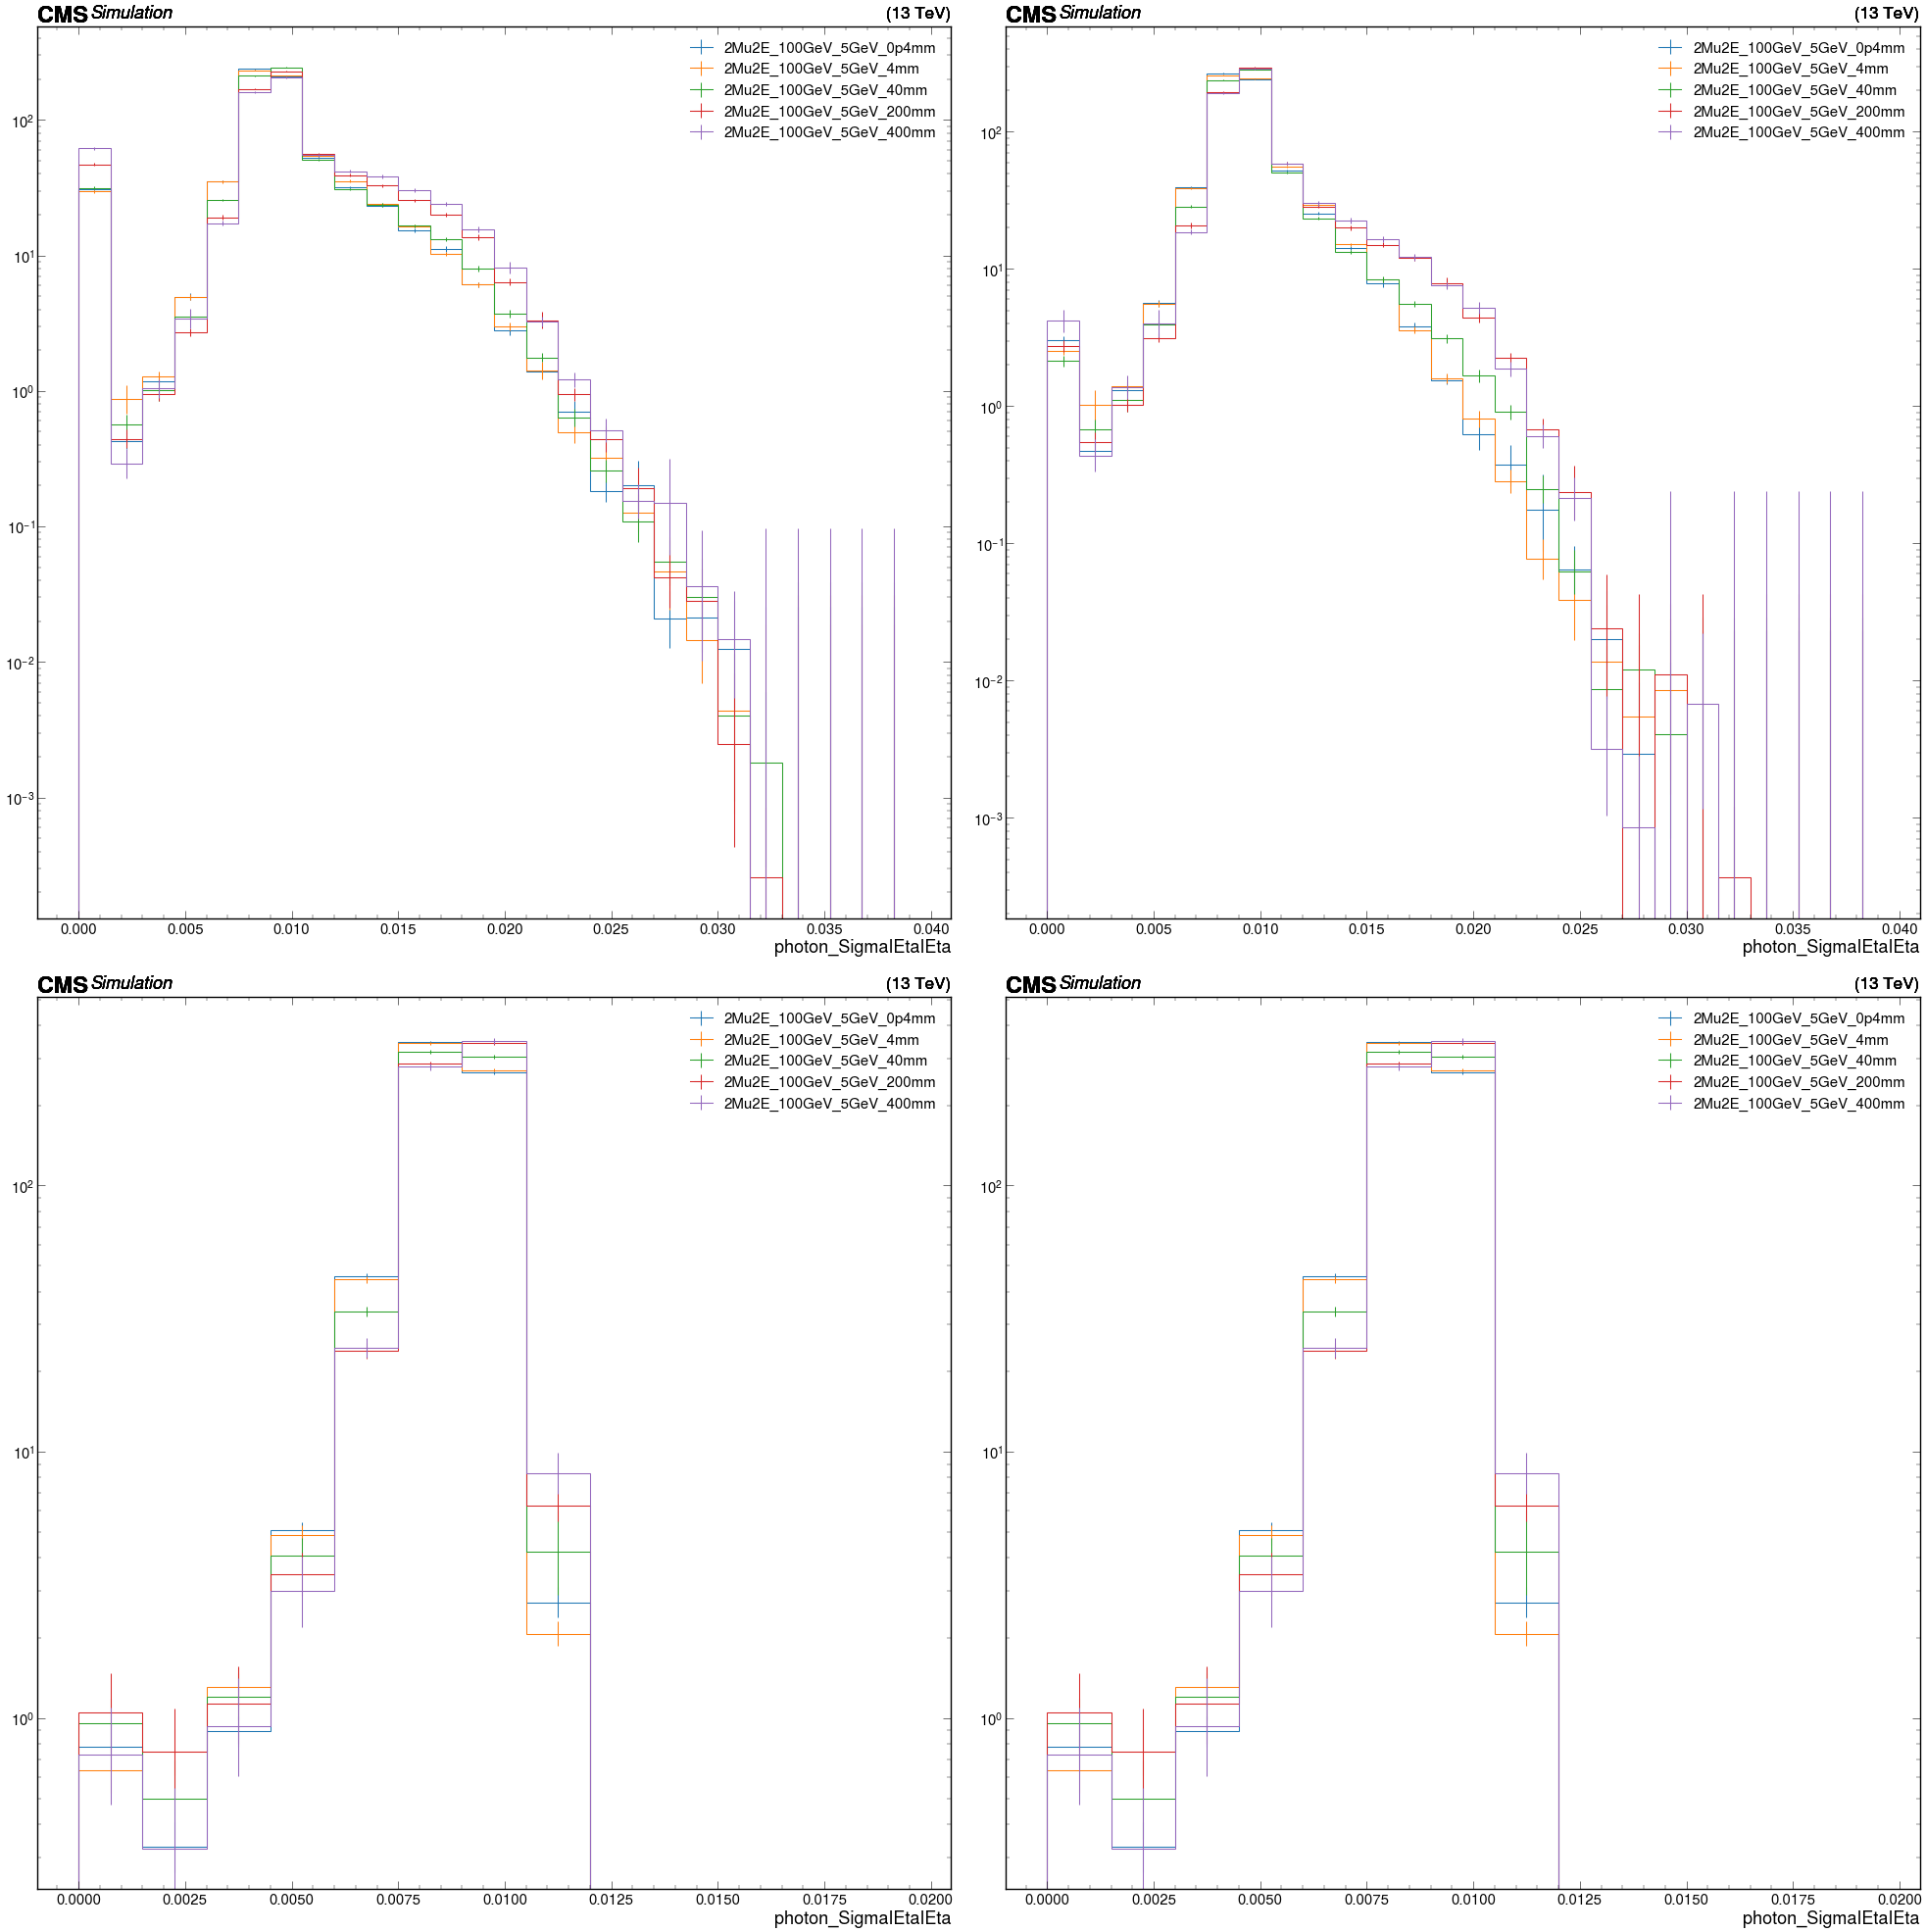

In [8]:
plt.subplots(2, 2, figsize=(40, 40))
plt.subplot(2, 2, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[0], :0.04j:], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(2, 2, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[1], :0.04j:], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(2, 2, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[2], :0.02j:], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.subplot(2, 2, 4)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_SigmaIEtaIEta"][channels[3], :0.02j:], density=True, flow=None, label=sample)
plt.legend()
plt.yscale("log")

plt.tight_layout()

In these plots, it seems generally the larger the displacement, the more tail the data has.

The following graphs look at AnyPFIsonWithEAAndQuadScaling histograms.

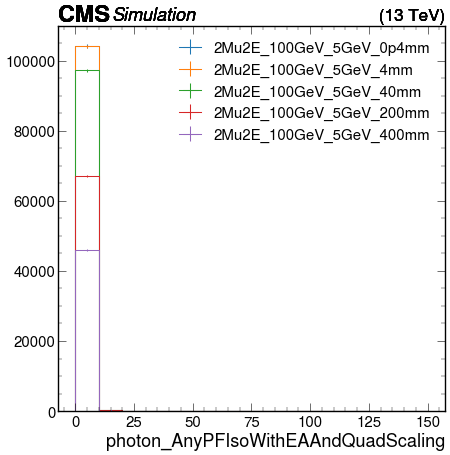

In [15]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[0], :150j:2j], flow=None, label=sample)
plt.legend()
#plt.yscale('log')

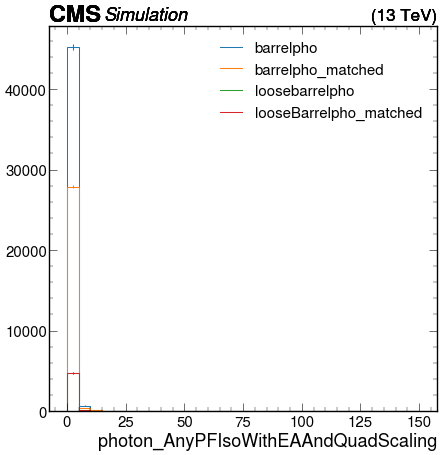

In [16]:
for channel in channels:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channel, :150j:], flow=None)
    plt.legend(channels)
#plt.yscale("log")

The cuts made with looseID can be seen clearly here in log scale.

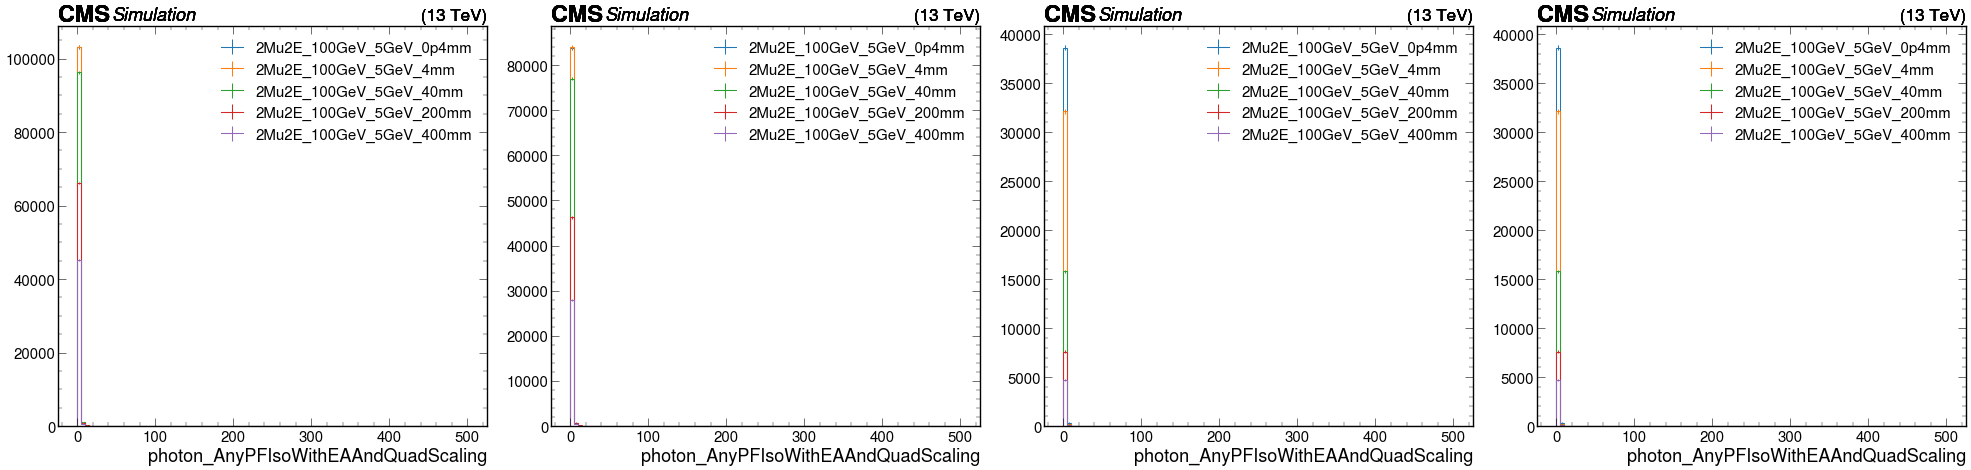

In [11]:
plt.subplots(1, 4, figsize=(40, 10))
plt.subplot(1, 4, 1)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[0], :], flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 2)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[1], :], flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 3)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[2], :], flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.subplot(1, 4, 4)
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEAAndQuadScaling"][channels[3], :], flow=None, label=sample)
plt.legend()
#plt.yscale("log")

plt.tight_layout()

/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/opt/conda/lib/python3.9/site-packages/mplhep/utils.py:197: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  return np.abs(method_fcn(self.values, variances) - self.values)
/tmp/

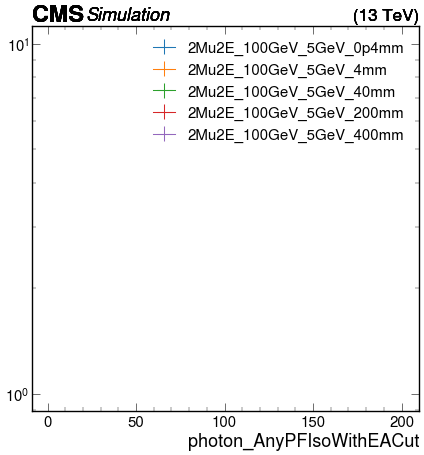

In [14]:
for sample in samples:
    utilities.plot(out[sample]["hists"]["photon_AnyPFIsoWithEACut"][channels[0], :], flow=None, label=sample)
plt.legend()
plt.yscale('log')

AnyPFIsoWithEA doesn't work